In [2]:
import numpy as np
import pandas as pd

In [3]:
loan = pd.read_csv("C://Users//classroom2-DTP//Downloads//loan.csv")

In [6]:
loan.head(100)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,0
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,1
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,0


### Some Probability Questions on Loan Data
1. What is the Probability of Applicant's Income being more than 25000


2. Find the Probability of Loan Status(0) where the Credit Rating of the Customer is 1


3. What is the probability of Graduates not getting the Loans

4. If the Property is Urban, what is the probability of Applicant's Income More than Mean Ans -28%

P(A and B) = P(A) * P(B|A) 


In [16]:
# Prob#1
# Mew and Sigma
from scipy.stats import norm
mu = loan.ApplicantIncome.mean()
sd = loan.ApplicantIncome.std()

# find the z score
z = (25000-mu)/sd
1-norm.cdf(z)

0.0006687888219636395

In [21]:
loan.Credit_History.value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [20]:
loan.Credit_History = loan.Credit_History.fillna(1.0)

In [23]:
# Find the Dataset where the Crdit History is 1
loan[loan.Credit_History==1]["Loan_Status"].value_counts()

1    415
0    110
Name: Loan_Status, dtype: int64

In [26]:
#loan[loan.Credit_History==1].shape # 525
(525/614)*(110/525) # P(Loan.Stats = 0 | Credit Rating =1)

0.17915309446254074

In [27]:
# If the Property is Urban, 
# what is the probability of Applicant's Income More than Mean
d = loan[loan.Property_Area=="Urban"]

In [29]:
d.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [42]:
d[d.ApplicantIncome>d.ApplicantIncome.median()].count() # 58

Loan_ID              101
Gender                98
Married              100
Dependents            95
Education            101
Self_Employed         94
ApplicantIncome      101
CoapplicantIncome    101
LoanAmount            97
Loan_Amount_Term      99
Credit_History       101
Property_Area        101
Loan_Status          101
dtype: int64

In [43]:
# Prob
(101/d.shape[0])*100 

50.0

In [37]:
loan[(loan.Property_Area=="Urban") & 
     (loan.ApplicantIncome>loan.ApplicantIncome.mean())].count()

Loan_ID              58
Gender               56
Married              58
Dependents           56
Education            58
Self_Employed        54
ApplicantIncome      58
CoapplicantIncome    58
LoanAmount           55
Loan_Amount_Term     57
Credit_History       58
Property_Area        58
Loan_Status          58
dtype: int64

In [7]:
# Missing Values in data
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 62.4+ KB


In [8]:
loan.describe(include = "object")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
count,614,601,611,599,614,582,614
unique,614,2,2,4,2,2,3
top,LP001754,Male,Yes,0,Graduate,No,Semiurban
freq,1,489,398,345,480,500,233


In [12]:
loan.Gender.value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [10]:
# Use Male to impute Missin Value in Gender
loan.Gender = loan.Gender.fillna("Male")

In [13]:
loan.shape

(614, 13)

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


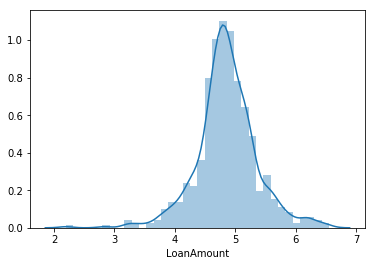

In [22]:
sns.distplot(np.log(loan[loan.LoanAmount.notnull()]["LoanAmount"]))

In [21]:
loan.LoanAmount.describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [24]:
loan.LoanAmount = loan.LoanAmount.fillna(128)

In [23]:
np.log(loan[loan.LoanAmount.notnull()]["LoanAmount"]).describe()

count    592.000000
mean       4.857444
std        0.505142
min        2.197225
25%        4.605170
50%        4.852030
75%        5.123964
max        6.551080
Name: LoanAmount, dtype: float64

# Poisson Example

1. On average, a household receives 9.5 telemarketing phone calls per week. Using the Poisson probability distribution formula, find the probability that a randomly selected household receives exactly 6 telemarketing phone calls during a given week.  Ans: 0.0764


2. The number of work-related injuries per month in a manufacturing plant is known to follow a Poisson distribution, with a mean of 2.5 work-related injuries a month. What is the probability that in a given month, a) No work related injuries occur? b) At least one work-related injury occurs?



In [2]:
from scipy.stats import poisson

In [3]:
poisson.pmf(k =6, mu = 9.5 ) # here mu = lambda/avg

0.07642079604012611

In [4]:
# Case a mu  = 2.5, k = 0
poisson.pmf(0, 2.5)

0.0820849986238988

In [5]:
# Case 2
1-poisson.pmf(0, 2.5)

0.9179150013761012

3. Cynthia’s Mail Order Company provides free examination of its products for 7 days. If not completely satisfied, a customer can return the product within that period and get a full re- fund. According to past records of the company, an average of 2 of every 10 products sold by this company are returned for a refund. Find the probability that exactly 6 of the 40 products sold by this company on a given day will be returned for a refund. Ans: 0.1221



4. A Life Insurance agent sells on the average 3 life insurance policies per week. Use the Poisson law to calculate the probability that in a given week, he will sell  2 or more but less than 5 policies?


In [11]:
# What is lambda here...mu = 8, k = 6
poisson.pmf(np.arange(0,9),8)

array([0.00033546, 0.0026837 , 0.0107348 , 0.02862614, 0.05725229,
       0.09160366, 0.12213822, 0.13958653, 0.13958653])

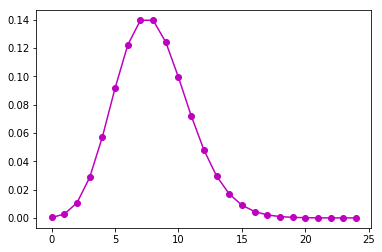

In [15]:
plt.plot(np.arange(0,25),poisson.pmf(np.arange(0,25),8), "o-", color = "m")

# Continuous Random variable - Normal Distribution

1. Calculate the prob by finding the area under the curve.

A survey on use of smart phones in India was conducted and it is observed the smart phone users spend 68 minutes in a day on average in sending messages and the corresponding standard deviation is 12 minutes.

Assume that the time spent in sending messages follows a normal distribution.
What proportion of the smart phone users are spending more than 90 minutes in sending messages daily?
What proportion of customers are spending less than 20 minutes?
What proportion of customers are spending between 50 minutes and 100 minutes?



In [13]:
# import the library
from scipy.stats import norm

In [17]:
# Step 1 Identify the Mu and Sigma
mu = 68
sigma = 12

In [18]:
# Step 02: Rather convert it into standard normal using Z Score Formula
z = (90 - mu)/sigma

In [21]:
# Step 3 Find the Probability following the normal distribution
1 - norm.cdf(z)

0.03337650758481725

In [22]:
# What proportion of customers are spending less than 20 minutes? 
z = (20-mu)/sigma
print("The Probability appears to be %1.7f" %norm.cdf(z))

The Probability appears to be 0.0000317


In [23]:
# What proportion of customers are spending between 50 minutes 
# and 100 minutes?
z1 = (50-mu)/sigma
z2 = (100-mu)/sigma

norm.cdf(z2) - norm.cdf(z1)

0.9293624181635521

The mean salaries of Data Scientists working in Chennai, India is calculated to be 7,00,000 INR with a standard deviation of 90,000 INR. The random variable salary of Data Scientists follows a normal distribution.

What is the probability that a Data Scientist in Chennai has a salary more than 10,00,000 INR? Ans - 0.0004

What is the probability that a Data Scientist in Chennai has a salary between 6,00,000 & 9,00,000 INR? Ans - 0.8536

What is the probability that a Data Scientist in Chennai has a salary less than 4,00,000 INR? Ans - 0.0004


In [29]:
# Case 1
mu = 700000
sd = 90000
z = (400000-mu)/sd
round(norm.cdf(z), 4)

0.0004

In [27]:
# Case 2
z1 = (600000-mu)/sd
z2 = (900000-mu)/sd
norm.cdf(z2)-norm.cdf(z1)

0.8536055914064735

# Hypothesis Testing

### A principal of a college claims that the Avg IQ of the Students is above average.

A random sample of 100 students' IQ had a mean score of 115. The Population mean IQ is 100 with a SD of 15. Is there sufficient evidence to support the claim? 

In [44]:
import numpy as np
import pandas as pd
import scipy.stats as stats # stats library

### Step1 - Define the Ho & H1

H0: mu = 100 | Null Hypothesis
H1: mu > 100 | Alternate Hypothesis


### Step 2 : Choose the Alpha level.
here we select the alpha = 0.05 and n >30.

### Step 3: Identify the Test
Population SD is given and n >30. Hence we will follow the Z-test.

In [45]:
# Calculate the test statistic
xbar = 115
mu = 100
sd = 15
n = 100
ztest_val = (xbar-mu)/(sd/np.sqrt(n))

In [46]:
ztest_val

10.0

In [47]:
if (ztest_val>1.96):
    print("Reject the Null Hypothesis")
else:
    print("Fail to Reject the H0")

Reject the Null Hypothesis


### Conclusion

Claim is Incorrect that the Student's Avg IQ is above average.

In [48]:
# Import the Required Library
#import scipy.stats as stats

In [54]:
# Finding the Critical value
round(stats.norm.isf(0.025),2)

1.96

The mayor of a large city claims that the average net worth of families living in this city is at least 300,000. A random sample of 25 families selected from this city produced a mean net worth of 288,000. 

Assume that the net worth of all families in this city have a normal distribution with the population standard deviation of 80,000.
Using the 2.5% significance level, can you conclude that the mayor’s claim is false?


In [55]:
# Null 
mu = 300000 # Null Hypothesis
xbar = 288000
sd = 80000
alpha = 0.025

# H1 - mu < 300000

In [56]:
# Find the Z Test Statistic
ztest = (xbar-mu)/(sd/np.sqrt(25))

In [57]:
print(ztest)

-0.75


In [58]:
if (ztest>stats.norm.isf(alpha)):
    print("Reject the Null Hypothesis")
else:
    print("Fail to Reject the H0")

Fail to Reject the H0


At Canon Food Corporation, it used to take an average of 90 minutes for new workers to learn a food processing job. Recently the company installed a new food processing machine. The supervisor at the company wants to find if the mean time taken by new workers to learn the food processing procedure on this new machine is different from 90 minutes.

A sample of 20 workers showed that it took, on average, 85 minutes for them to learn the food processing procedure on the new machine.

It is known that the learning times for all new workers are normally distributed with a population standard deviation of 7 minutes. 

Find the p-value for the test that the mean learning time for the food processing procedure on the new machine is different from 90 minutes. What will your conclusion be if alpha=0.01?


In [59]:
# Null Hypothesis
mu = 90
xbar = 85
sd = 7
# Alternate Hypothesis - mu !=90 | Two Tail Test

In [60]:
# Find the Z Test Statistic
ztest = (xbar-mu)/(sd/np.sqrt(20))

In [61]:
print(ztest)

-3.1943828249996997


In [63]:
# Since the Z Test Statistic is less than -1.96 (CV). hence it is falling in Rejection Region.

False

# Case Study - Internet Mobile Time

Experience marketing Services reported that the typical American spend a mean of 144 minutes(2.4 hours) per day accessing the internet via mobile device. In order to test the validity of the statement, you select a sample of 30 friends and family. The resut for the time spent per day accessing the Internet via mobile device (in minutes) are stored.

# is there enough evidence that Pop Mean time spent per day accessing the internet via mobile device is different from 144 minutes.

In [64]:
# Two Tail Test
mobile = pd.read_csv("C://Users//classroom2-DTP//Downloads//InternetMobileTime.csv")

In [65]:
mobile.head()

,Minutes
0,72
1,144
2,48
3,72
4,36


In [70]:
# Null = mu = 144
xbar = mobile.Minutes.mean()
sample_sd = mobile.Minutes.std()
mu = 144
n = len(mobile)

In [72]:
# Calculate the test statistic
teststats = (xbar-mu)/(sample_sd/np.sqrt(n))

In [74]:
teststats

1.2246743653638934

In [75]:
# Calculation of P Value basis the t test
p = 1-stats.t.cdf(teststats, n-1) # substracting 1 so that it can give me P value (Rejection Region)

In [76]:
p 

0.11527663441491875

In [77]:
p <0.05

False

# Since the p value is greater than 0.05, hence we fail to reject the Null Hypothesis.

Ground Rule - If the p value <0.05, then we reject the H0

## Case Study - Body Temperature

Suppose a doctor claims that 17 year old have an avg body temp that is higher than the commonly accepted average human temperature of 98.6 F. Sample carries the age of 17.

Find out if the statement is True.


In [78]:
# Two Tail Test
temp = pd.read_csv("C://Users//classroom2-DTP//Downloads//Temperature.csv")

In [81]:
# Null Hypothesis
mu = 98.6
# Alternate Hypothesis - mu > 98.6

In [98]:
stats.ttest_1samp(temp.Temperature, 98.6)

Ttest_1sampResult(statistic=-0.006668602694974534, pvalue=0.9947343867528586)

# Two Sample T Test Case Study

Two Unrelated Samples are provided. Data was collected on the weight loss of 16 women and 20 men enrolled in weight reduction program. At Alpha = 0.05 test whether the weight loss of these two samples are different.

In [106]:
# Null Hyp - mu(men) = mu(women) | mu(men) - mu(women) = 0
# Alt Hyp : mu(men) != mu(women)

wt = pd.read_csv("C://Users//classroom2-DTP//Downloads//Weight.csv")

np.array(wt.Weight_Male)


array([3.69, 4.12, 4.65, 3.19, 4.34, 3.68, 4.12, 4.5 , 3.7 , 3.09, 3.65,
       4.73, 3.93, 3.46, 3.28, 4.43, 4.13, 3.62, 3.71, 2.92])

In [110]:
np.array(wt.Weight_Female.dropna())

array([2.99, 1.8 , 3.79, 4.12, 1.76, 3.5 , 3.61, 2.32, 3.67, 4.26, 4.57,
       3.01, 3.82, 4.33, 3.4 , 3.86])

In [111]:
# Test of Significance
stats.ttest_ind(np.array(wt.Weight_Female.dropna()), np.array(wt.Weight_Male))

Ttest_indResult(statistic=-1.827188295981286, pvalue=0.0764604205335295)

### Conclusion - Since, the pvalue > 0.05 (LOS) hence we fail to reject the null hypothesis. There is no significance difference in the weight loss of males and females

## Case Study of Students
25 students score in their final practice exam before and after. At 5% level of significance, find if the coaching really had an impact on performance. This is a related sample

In [113]:
marks_before = [52, 56, 51, 47, 58, 52, 56, 60, 52, 46, 51, 62, 54, 50, 48, 59, 56, 51, 52, 
                44, 52, 45, 57, 60, 45]

marks_after = [62, 54, 40, 65, 76, 82, 53, 68, 77, 60, 69, 34, 69, 73, 67, 
               82, 62, 49, 44, 43, 77, 61, 67, 67, 54]

# Tip use stats.tttest_rel because the samples are RELATED.

In [114]:
# Null Hyp mean(scores_before) = mean(scores_after)
# Alt Hyp: mean(scores_before) != mean(scores_after)
stats.ttest_rel(marks_before, marks_after)

Ttest_relResult(statistic=-3.5504295712891536, pvalue=0.0016259982497311876)

### Conclusion - Since, the pvalue < 0.05 (LOS) hence we Reject the Null Hypothesis. There is significance impact of the mentoring on students. The Scores are different

### Case Study - Finding if Love Break Up has effect on alcohol consumption

Conduct a paired t test to check whether the alcohol consumption is more after the break up.

LOS = 5%

In [120]:
alc_cons_before = np.array([470, 354, 496, 351, 349, 449, 378, 359, 469, 329, 389, 497, 
                    493, 268, 445, 287, 338, 271, 412, 335])

alc_cons_after = np.array([408, 439, 321, 437, 335, 344, 318, 492, 531, 417, 358,
                   391, 398, 394, 508, 399, 345, 341, 326, 467])

In [127]:
# Null Hyp : alc.cons.after = alc.con.before
# Alt Hyp : alc.cons.after != alc.con.before
stats.ttest_rel(alc_cons_after, alc_cons_before)

Ttest_relResult(statistic=0.5375404241815105, pvalue=0.5971346738292477)

### Conclusion - Since, the pvalue > 0.05 (LOS) hence we Fail to Reject the Null Hypothesis. There is No change in the drinking pattern irrespective of whatsoever and whosoever.

### Case Study - Check if new therapy leads to change in weight

here is the weight of 25 people before they started a new therapy and then again 6 months later the weight was captured. Find if there is a significant difference


In [130]:
wt_before = [76,76,72,73,64,63,75,75,71,76,71,76,78,73,76,70,71,82,84,68,70,68,66,67,74]
wt_after =  [63,72,67,69,58,59,70,71,70,71,68,71,72,69,92,67,67,78,79,62,67,63,61,63,69]

In [131]:
# Null Hyp: wt_before.mean() = wt_after.mean()
# Alt Hyp: wt_before.mean() != wt_after.mean()
stats.ttest_rel(wt_before, wt_after)


Ttest_relResult(statistic=4.19760052735678, pvalue=0.0003194442840568375)

### Home Assignment

The delivery time of Pizza from Zomato and local restaurant is captured. At 5% LOS, is the mean delivery time for Zomato is less than from Local Restaurant

In [129]:
Zomato_Delivery = [16.8, 11.7, 15.6, 16.7, 17.5, 18.1, 14.1, 21.8, 13.9, 20.8]
Local_Rest_Delivery = [22.0, 15.2, 18.7, 15.6, 20.8, 19.5, 17.0, 19.5, 16.5, 24.0]